In [11]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [2]:
# loading Database
with open('/content/sample_data/PFM_database', 'r') as file:
    lines = file.readlines()

In [3]:
# reading the first matrix >MA0001
selected_lines = lines[6:10]
matrix = np.loadtxt(selected_lines)

In [4]:
def print_matrix_with_indices(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            print(matrix[i][j], end=' ')
        print()

print_matrix_with_indices(matrix)

3.0 1.0 0.0 0.0 32.0 1.0 0.0 0.0 18.0 12.0 
0.0 3.0 0.0 0.0 8.0 60.0 64.0 64.0 10.0 20.0 
60.0 0.0 64.0 64.0 15.0 2.0 0.0 0.0 29.0 26.0 
1.0 60.0 0.0 0.0 9.0 1.0 0.0 0.0 7.0 6.0 


In [5]:
# making PPM from the PFM
total_sequences = np.sum(matrix[:, 0])
PPM = matrix / total_sequences

In [6]:
def generate_sequence(ppm_matrix, sequence_length, num_sequences):
    num_positions = ppm_matrix.shape[1]
    sequences = []

    for _ in range(num_sequences):
      sequence = []
      for _ in range(sequence_length):
          probabilities = ppm_matrix[:, len(sequence)]
          nucleotides = ['A', 'C', 'G', 'T']
          nucleotide = np.random.choice(nucleotides, p=probabilities)
          sequence.append(nucleotide)
      sequences.append(sequence)

    return sequences

In [7]:
# generating a random sequence based on PPM
sequences = generate_sequence(PPM, 10, 30)

In [8]:
def create_PFM(sequences):
  num_columns = len(sequences[0])

  pfm = np.zeros((4, num_columns))

  for s in sequences:
    for i, nucleotide in enumerate(s):
      if nucleotide == 'A':
        pfm[0, i] += 1
      elif nucleotide == 'C':
        pfm[1, i] += 1
      elif nucleotide == 'G':
        pfm[2, i] += 1
      elif nucleotide == 'T':
        pfm[3, i] += 1
  return pfm

In [9]:
sample_pfm = create_PFM(sequences)

In [12]:
def all_possible_w_mer(length):

  combinations = product('ACGT', repeat=length)

  w_mers = [''.join(combination) for combination in combinations]

  return w_mers

In [17]:
list_w_mers = all_possible_w_mer(10)

Sequence based comparison : ED

In [19]:
nucleotides = ['A', 'C', 'G', 'T']

In [21]:
pseudocount = 0.01
x = []
y = []
x2 = []
y2 = []
x3 = []
y3 = []
z = 0
counter = 1
sum = 0
sum2 = 0
sum3 = 0
sum_PPM = 0
sum_artificial = 0

while z <= 60:

    print(counter)

    pseudocount = np.power(10, ((z / 20) - 2))

    artificial_PPM = sample_pfm + (pseudocount / 4)
    artificial_PPM = artificial_PPM/(30 + pseudocount)

    print("Pseudocount: ",pseudocount)

    for s in list_w_mers:

      indices = [nucleotides.index(nucleotide) for nucleotide in s]
      score_PPM = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM = np.prod(artificial_PPM[indices, range(len(s))])

      # ED
      result = np.power((score_PPM - score_artificial_PPM), 2)
      sum += result

      #Cos
      sum_PPM += np.power(score_PPM, 2)
      sum_artificial += np.power(score_artificial_PPM, 2)
      sum2 += (score_PPM * score_artificial_PPM)

      #TVD
      sum3 += np.abs(score_PPM - score_artificial_PPM)

    cos = 1 - (sum2 / (np.sqrt(sum_PPM) * np.sqrt(sum_artificial)))
    ED = np.sqrt(sum)
    tvd = sum3 / 2
    print("ED:",ED)
    print("COS:",cos)
    print("TVD:", tvd)

    x.append(pseudocount)
    x2.append(pseudocount)
    x3.append(pseudocount)
    y.append(ED)
    y2.append(cos)
    y3.append(tvd)
    z += 1
    counter += 1
    sum = 0
    sum2 = 0
    sum3 = 0
    sum_PPM = 0
    sum_artificial = 0
    print("--------------------------------------------------------------")

1
Pseudocount:  0.01
ED: 0.06724018104374777
COS: 0.043012745744662184
TVD: 0.23106554828195616
--------------------------------------------------------------
2
Pseudocount:  0.011220184543019636
ED: 0.06720164498462901
COS: 0.043007627820019434
TVD: 0.23103804331446273
--------------------------------------------------------------
3
Pseudocount:  0.012589254117941675
ED: 0.06715843757086745
COS: 0.0430018891970364
TVD: 0.2310072056962834
--------------------------------------------------------------
4
Pseudocount:  0.01412537544622754
ED: 0.06710999678591711
COS: 0.042995455118101544
TVD: 0.2309726348428877
--------------------------------------------------------------
5
Pseudocount:  0.015848931924611134
ED: 0.06705569410653339
COS: 0.04298824195714612
TVD: 0.2309338828537918
--------------------------------------------------------------
6
Pseudocount:  0.01778279410038923
ED: 0.06699482692561959
COS: 0.04298015620302742
TVD: 0.2308904491417198
---------------------------------------

In [24]:
optimal_ED = min(y)
optimal_COS = min(y2)
optimal_TVD = min(y3)

In [25]:
optimal_ED

0.04183189214292831

optimal pseudocount using ED : 1.58

In [26]:
optimal_COS

0.038702741242879646

optimal pseudocount using COS : 2.23

In [27]:
optimal_TVD

0.22436500900827866

optimal pseudocount using TVD = 0.6

In [22]:
normalized = np.interp(y, (np.min(y), np.max(y)), (0, 1))
normalized2 = np.interp(y2, (np.min(y2), np.max(y2)), (0, 1))
normalized3 = np.interp(y3, (np.min(y3), np.max(y3)), (0, 1))

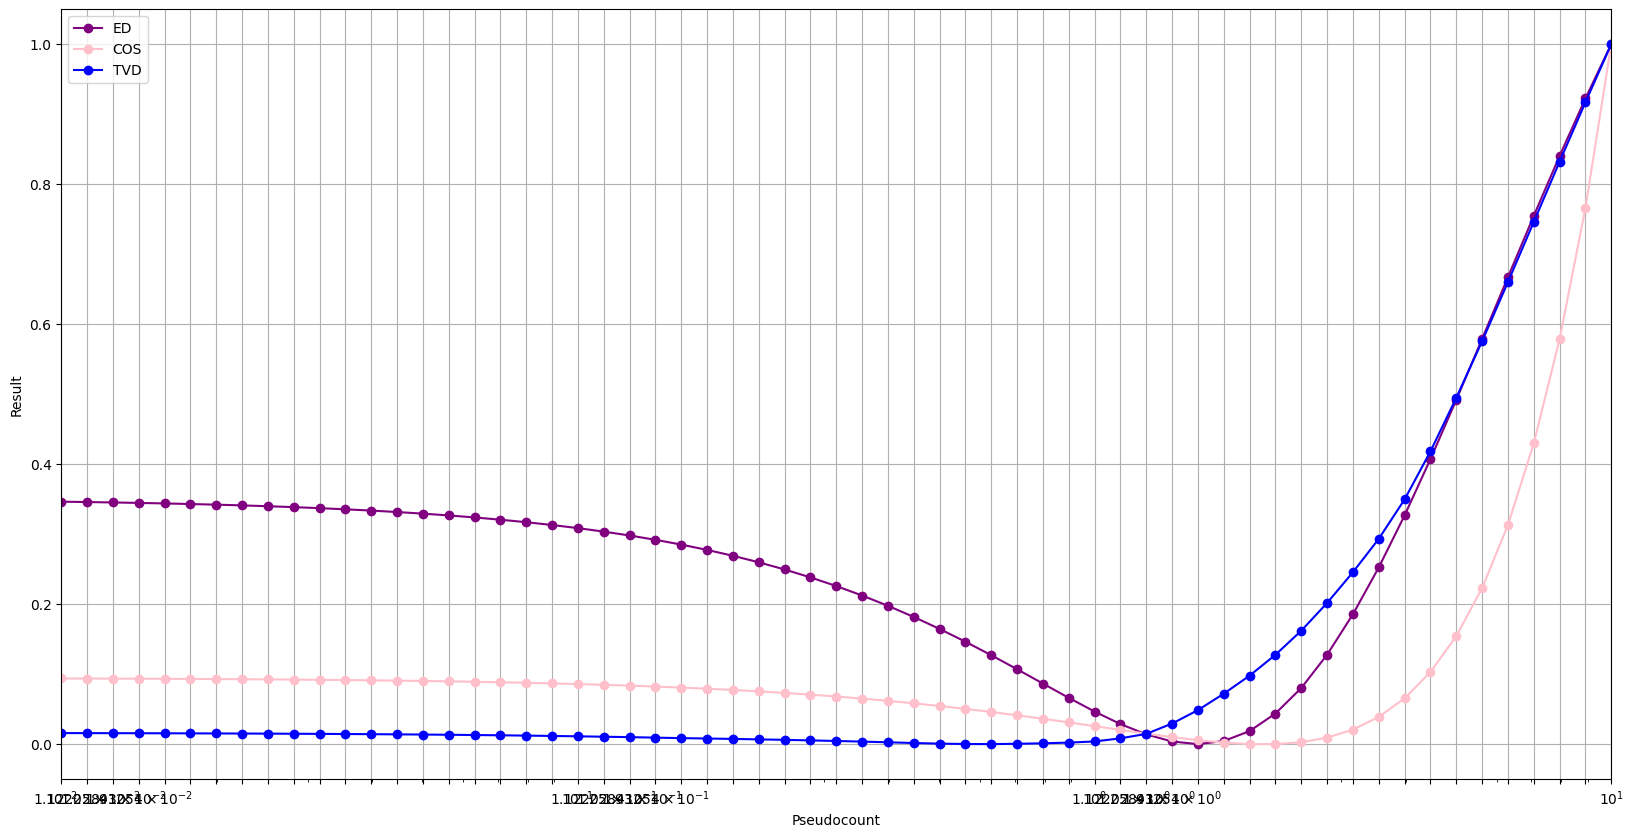

In [23]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['purple', 'pink', 'blue', 'yellow'])
plt.figure(figsize=(20, 10))
plt.semilogx(x, normalized, label='ED',marker='o', linestyle='-')
plt.semilogx(x2, normalized2, label='COS',marker='o', linestyle='-')
plt.semilogx(x3, normalized3, label='TVD',marker='o', linestyle='-')
plt.xlabel('Pseudocount')
plt.ylabel('Result')
plt.xlim(0.01, 10)
plt.legend()
plt.grid(True)
plt.xticks(x3)
plt.show()

Effect of Sample Size

In [58]:
# loading Database
with open('/content/sample_data/PFM_database', 'r') as file:
    lines = file.readlines()

In [48]:
selected_lines = lines[151:155]
matrix = np.loadtxt(selected_lines)

In [49]:
matrix

array([[100.,   0.,   0.,   0.,  11.],
       [  0.,   0.,   0.,   0.,  12.],
       [  0., 100., 100., 100.,  77.],
       [  0.,   0.,   0.,   0.,   0.]])

In [50]:
total_sequences = np.sum(matrix[:, 0])
PPM = matrix / total_sequences

In [51]:
PPM

array([[1.  , 0.  , 0.  , 0.  , 0.11],
       [0.  , 0.  , 0.  , 0.  , 0.12],
       [0.  , 1.  , 1.  , 1.  , 0.77],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

In [52]:
sequences_10 = generate_sequence(PPM, 5, 10)
sequences_20 = generate_sequence(PPM, 5, 20)
sequences_30 = generate_sequence(PPM, 5, 30)
sequences_40 = generate_sequence(PPM, 5, 40)
sequences_50 = generate_sequence(PPM, 5, 50)

In [53]:
sample_pfm_10 = create_PFM(sequences_10)
sample_pfm_20 = create_PFM(sequences_20)
sample_pfm_30 = create_PFM(sequences_30)
sample_pfm_40 = create_PFM(sequences_40)
sample_pfm_50 = create_PFM(sequences_50)

In [54]:
list_w_mers = all_possible_w_mer(5)

In [55]:
pseudocount = 0.01
x = []
y = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
z = 0
sum_10 = 0
sum_20 = 0
sum_30 = 0
sum_40 = 0
sum_50 = 0


while z <= 60:

    pseudocount = np.power(10, ((z / 20) - 2))

    artificial_PPM_10 = sample_pfm_10 + (pseudocount / 4)
    artificial_PPM_10 = artificial_PPM_10/(10 + pseudocount)

    artificial_PPM_20 = sample_pfm_20 + (pseudocount / 4)
    artificial_PPM_20 = artificial_PPM_20/(20 + pseudocount)

    artificial_PPM_30 = sample_pfm_30 + (pseudocount / 4)
    artificial_PPM_30 = artificial_PPM_30/(30 + pseudocount)

    artificial_PPM_40 = sample_pfm_40 + (pseudocount / 4)
    artificial_PPM_40 = artificial_PPM_40/(40 + pseudocount)

    artificial_PPM_50 = sample_pfm_50 + (pseudocount / 4)
    artificial_PPM_50 = artificial_PPM_50/(50 + pseudocount)

    for s in list_w_mers:

      indices = [nucleotides.index(nucleotide) for nucleotide in s]
      score_PPM_10 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_10 = np.prod(artificial_PPM_10[indices, range(len(s))])

      score_PPM_20 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_20 = np.prod(artificial_PPM_20[indices, range(len(s))])

      score_PPM_30 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_30 = np.prod(artificial_PPM_30[indices, range(len(s))])

      score_PPM_40 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_40 = np.prod(artificial_PPM_40[indices, range(len(s))])

      score_PPM_50 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_50 = np.prod(artificial_PPM_50[indices, range(len(s))])

      result_10 = np.power((score_PPM_10 - score_artificial_PPM_10), 2)
      sum_10 += result_10

      result_20 = np.power((score_PPM_20 - score_artificial_PPM_20), 2)
      sum_20 += result_20

      result_30 = np.power((score_PPM_30 - score_artificial_PPM_30), 2)
      sum_30 += result_30

      result_40 = np.power((score_PPM_40 - score_artificial_PPM_40), 2)
      sum_40 += result_40

      result_50 = np.power((score_PPM_50 - score_artificial_PPM_50), 2)
      sum_50 += result_50

    ED_10 = np.sqrt(sum_10)
    ED_20 = np.sqrt(sum_20)
    ED_30 = np.sqrt(sum_30)
    ED_40 = np.sqrt(sum_40)
    ED_50 = np.sqrt(sum_50)


    x.append(pseudocount)
    x2.append(pseudocount)
    x3.append(pseudocount)
    x4.append(pseudocount)
    x5.append(pseudocount)
    y.append(ED_10)
    y2.append(ED_20)
    y3.append(ED_30)
    y4.append(ED_40)
    y5.append(ED_50)
    z += 1
    sum_10 = 0
    sum_20 = 0
    sum_30 = 0
    sum_40 = 0
    sum_50 = 0


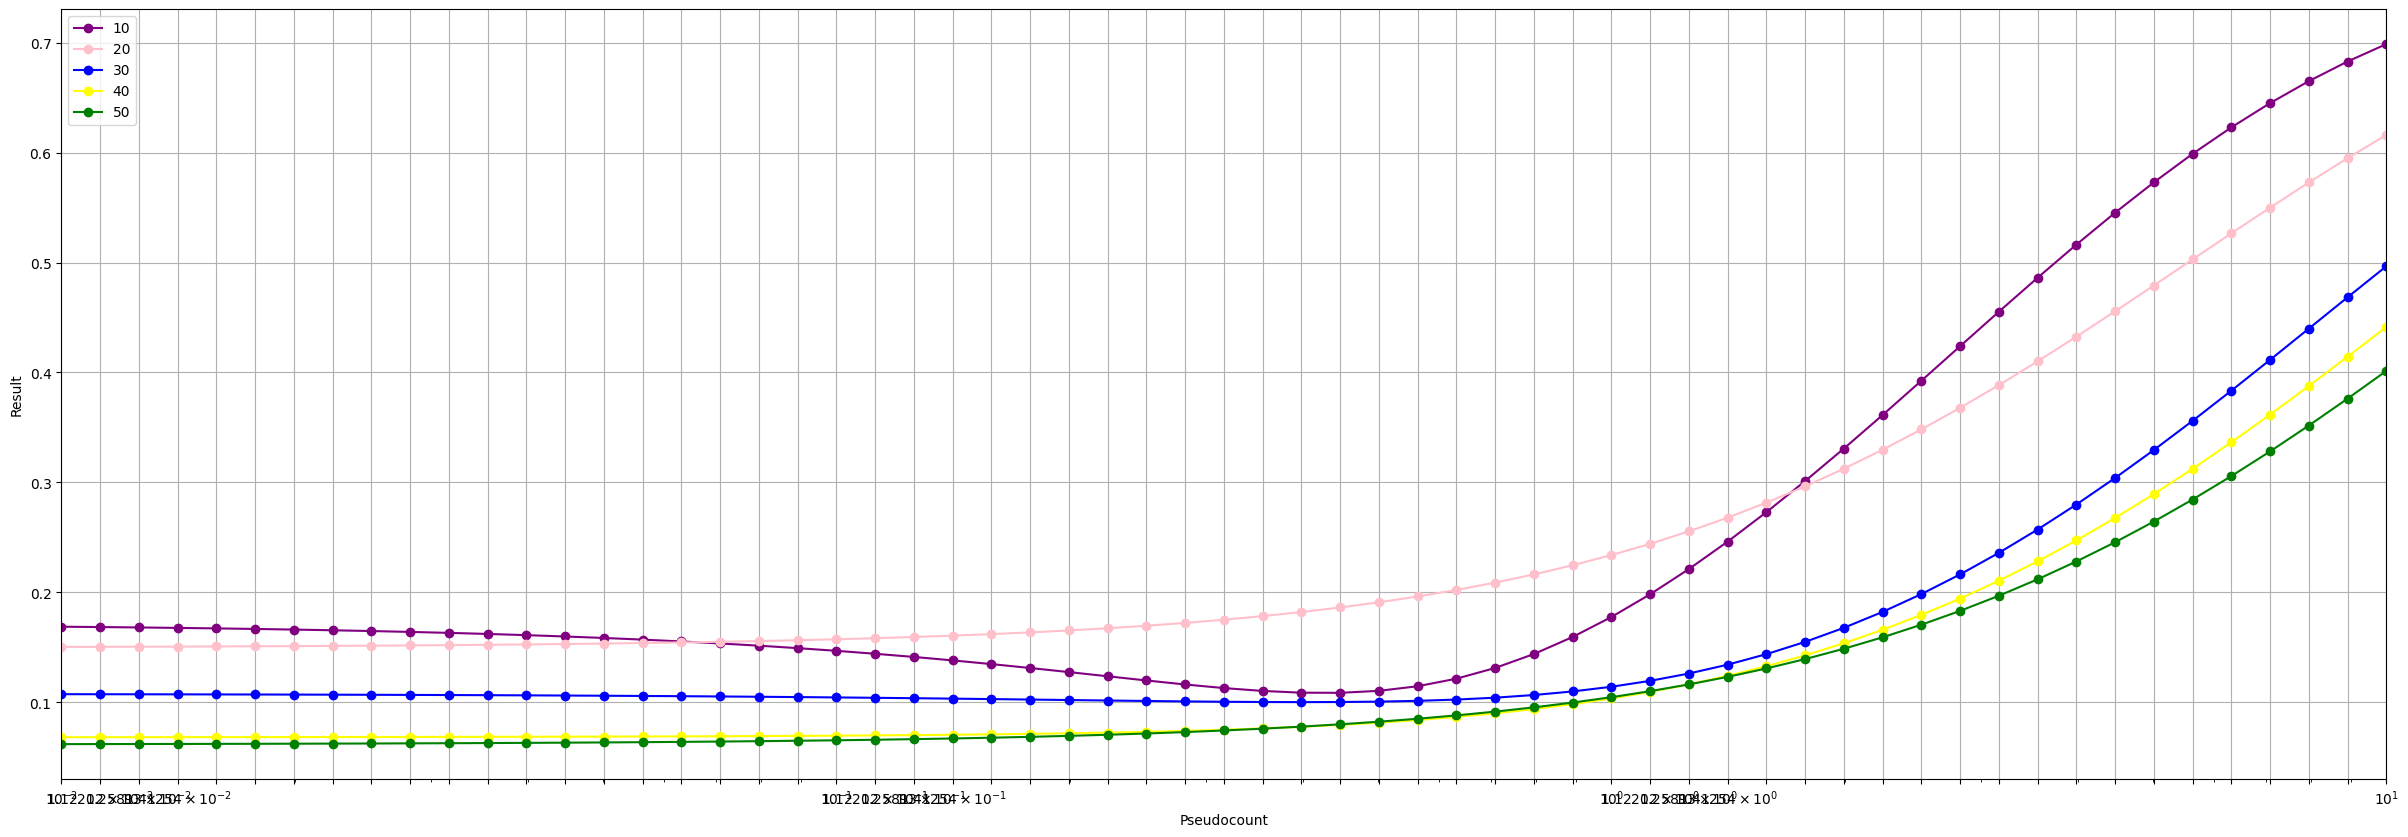

In [57]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['purple', 'pink', 'blue', 'yellow', 'green'])
plt.figure(figsize=(30, 10))
plt.semilogx(x, y, label='10',marker='o', linestyle='-')
plt.semilogx(x2, y2, label='20',marker='o', linestyle='-')
plt.semilogx(x3, y3, label='30',marker='o', linestyle='-')
plt.semilogx(x4, y4, label='40',marker='o', linestyle='-')
plt.semilogx(x5, y5, label='50',marker='o', linestyle='-')
plt.xlabel('Pseudocount')
plt.ylabel('Result')
plt.xlim(0.01, 10)
plt.xticks(x3)
plt.legend()
plt.grid(True)
plt.show()

Using different matrix

In [62]:
selected_lines = lines[156:160]
matrix = np.loadtxt(selected_lines)

In [63]:
total_sequences = np.sum(matrix[:, 0])
PPM = matrix / total_sequences

In [64]:
def generate_sequences(ppm_matrix, sequence_length, num_sequences):
  num_positions = ppm_matrix.shape[1]
  sequences = []

  for _ in range(num_sequences):
      sequence = []
      for i in range(sequence_length):
          col_sum = np.sum(ppm_matrix[:, i])

          rand_val = np.random.uniform(0, col_sum)

          col_idx = 0
          cumulative_sum = ppm_matrix[col_idx, i]
          while cumulative_sum < rand_val:
              col_idx += 1
              cumulative_sum += ppm_matrix[col_idx, i]

          nucleotides = ['A', 'C', 'G', 'T']
          nucleotide = nucleotides[col_idx]
          sequence.append(nucleotide)

      sequences.append(sequence)

  return sequences



In [65]:
sequences_10 = generate_sequences(PPM, 6, 10)
sequences_20 = generate_sequences(PPM, 6, 20)
sequences_30 = generate_sequences(PPM, 6, 30)
sequences_40 = generate_sequences(PPM, 6, 40)
sequences_50 = generate_sequences(PPM, 6, 50)

In [67]:
sample_pfm_10 = create_PFM(sequences_10)
sample_pfm_20 = create_PFM(sequences_20)
sample_pfm_30 = create_PFM(sequences_30)
sample_pfm_40 = create_PFM(sequences_40)
sample_pfm_50 = create_PFM(sequences_50)

In [68]:
list_w_mers = all_possible_w_mer(6)

In [69]:
pseudocount = 0.01
x = []
y = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
z = 0
sum_10 = 0
sum_20 = 0
sum_30 = 0
sum_40 = 0
sum_50 = 0


while z <= 60:

    pseudocount = np.power(10, ((z / 20) - 2))

    artificial_PPM_10 = sample_pfm_10 + (pseudocount / 4)
    artificial_PPM_10 = artificial_PPM_10/(10 + pseudocount)

    artificial_PPM_20 = sample_pfm_20 + (pseudocount / 4)
    artificial_PPM_20 = artificial_PPM_20/(20 + pseudocount)

    artificial_PPM_30 = sample_pfm_30 + (pseudocount / 4)
    artificial_PPM_30 = artificial_PPM_30/(30 + pseudocount)

    artificial_PPM_40 = sample_pfm_40 + (pseudocount / 4)
    artificial_PPM_40 = artificial_PPM_40/(40 + pseudocount)

    artificial_PPM_50 = sample_pfm_50 + (pseudocount / 4)
    artificial_PPM_50 = artificial_PPM_50/(50 + pseudocount)

    for s in list_w_mers:

      indices = [nucleotides.index(nucleotide) for nucleotide in s]
      score_PPM_10 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_10 = np.prod(artificial_PPM_10[indices, range(len(s))])

      score_PPM_20 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_20 = np.prod(artificial_PPM_20[indices, range(len(s))])

      score_PPM_30 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_30 = np.prod(artificial_PPM_30[indices, range(len(s))])

      score_PPM_40 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_40 = np.prod(artificial_PPM_40[indices, range(len(s))])

      score_PPM_50 = np.prod(PPM[indices, range(len(s))])
      score_artificial_PPM_50 = np.prod(artificial_PPM_50[indices, range(len(s))])

      result_10 = np.power((score_PPM_10 - score_artificial_PPM_10), 2)
      sum_10 += result_10

      result_20 = np.power((score_PPM_20 - score_artificial_PPM_20), 2)
      sum_20 += result_20

      result_30 = np.power((score_PPM_30 - score_artificial_PPM_30), 2)
      sum_30 += result_30

      result_40 = np.power((score_PPM_40 - score_artificial_PPM_40), 2)
      sum_40 += result_40

      result_50 = np.power((score_PPM_50 - score_artificial_PPM_50), 2)
      sum_50 += result_50

    ED_10 = np.sqrt(sum_10)
    ED_20 = np.sqrt(sum_20)
    ED_30 = np.sqrt(sum_30)
    ED_40 = np.sqrt(sum_40)
    ED_50 = np.sqrt(sum_50)


    x.append(pseudocount)
    x2.append(pseudocount)
    x3.append(pseudocount)
    x4.append(pseudocount)
    x5.append(pseudocount)
    y.append(ED_10)
    y2.append(ED_20)
    y3.append(ED_30)
    y4.append(ED_40)
    y5.append(ED_50)
    z += 1
    sum_10 = 0
    sum_20 = 0
    sum_30 = 0
    sum_40 = 0
    sum_50 = 0

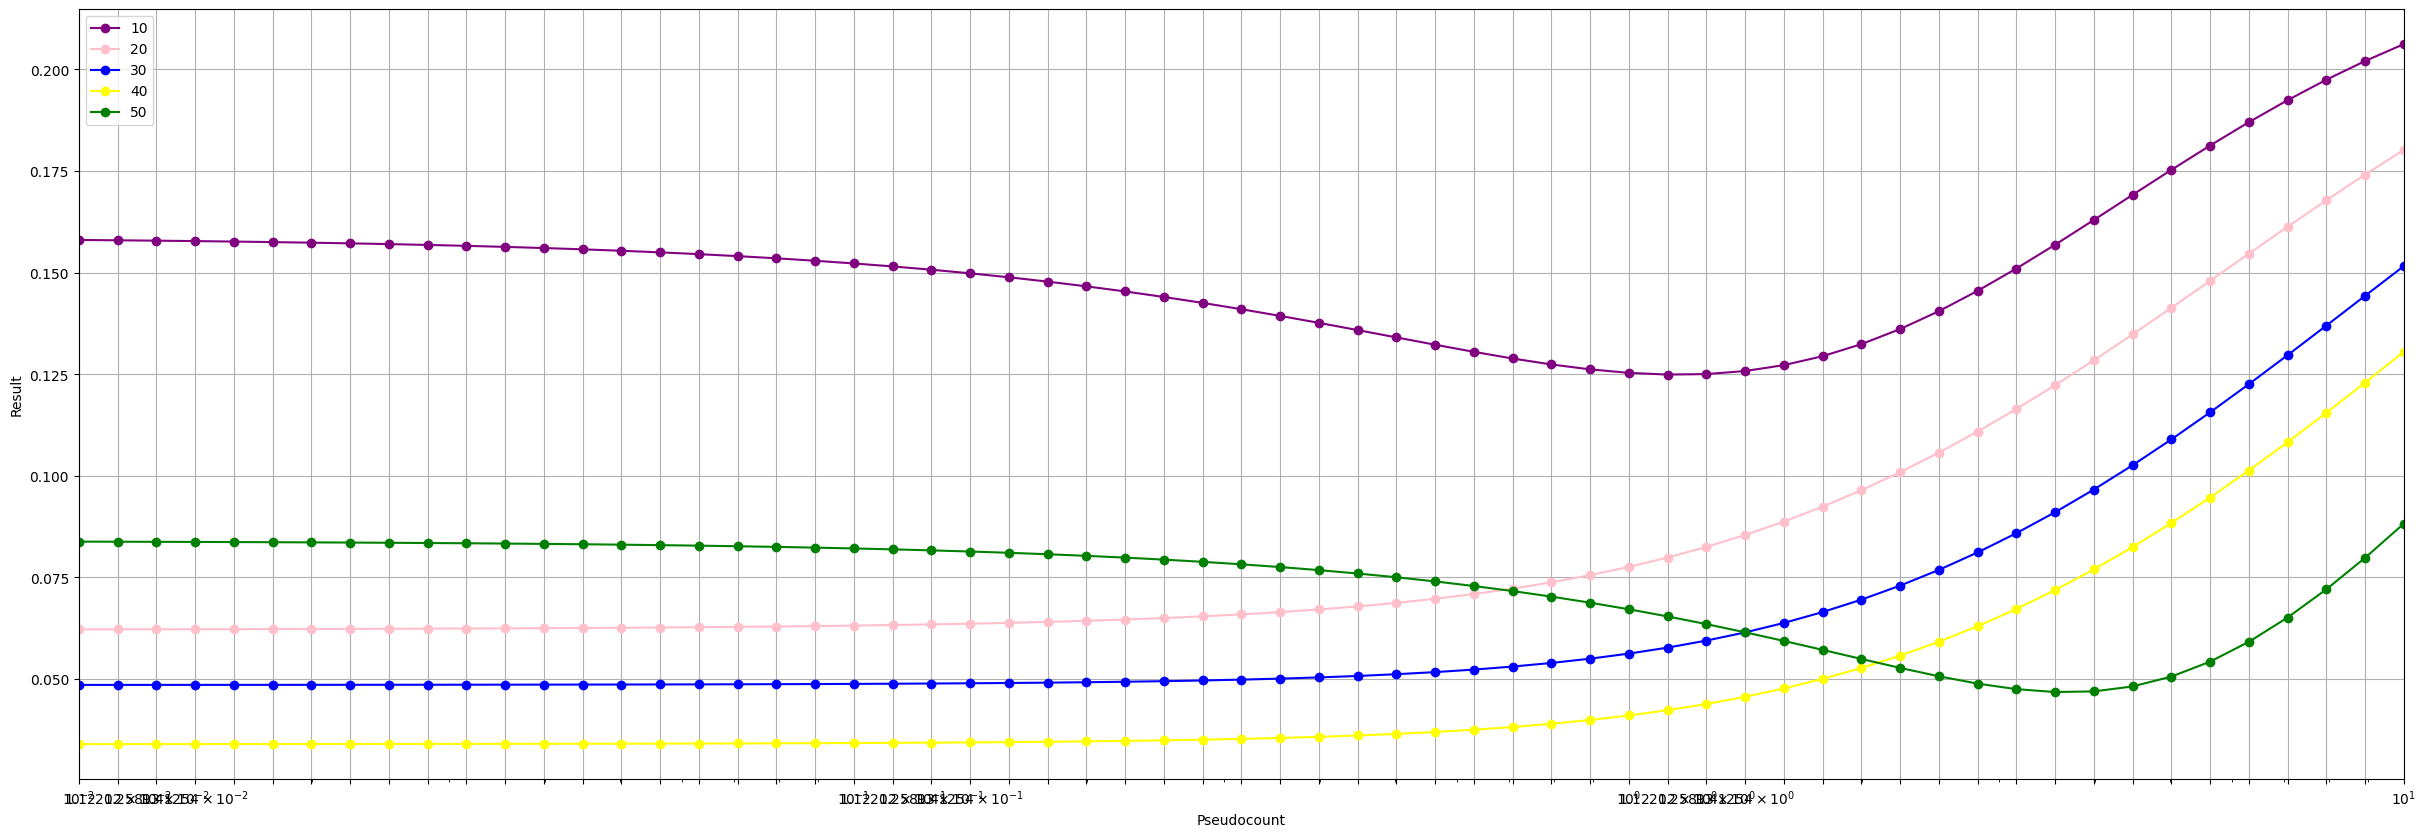

In [70]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['purple', 'pink', 'blue', 'yellow', 'green'])
plt.figure(figsize=(30, 10))
plt.semilogx(x, y, label='10',marker='o', linestyle='-')
plt.semilogx(x2, y2, label='20',marker='o', linestyle='-')
plt.semilogx(x3, y3, label='30',marker='o', linestyle='-')
plt.semilogx(x4, y4, label='40',marker='o', linestyle='-')
plt.semilogx(x5, y5, label='50',marker='o', linestyle='-')
plt.xlabel('Pseudocount')
plt.ylabel('Result')
plt.xlim(0.01, 10)
plt.xticks(x3)
plt.legend()
plt.grid(True)
plt.show()